In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [6]:
df = pd.read_csv('millas_por_galon.csv')
df.columns

Index(['nb_cilindros', 'desplazamiento', 'potencia', 'peso', 'aceleracion',
       'anio', 'modeo', 'mpg'],
      dtype='object')

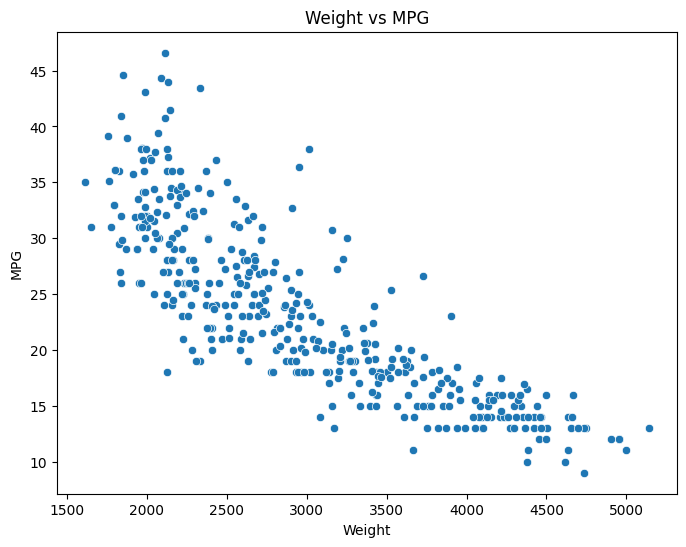

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="peso",y="mpg",data=df)
plt.title("Weight vs MPG")
plt.xlabel("Weight")
plt.ylabel("MPG")
plt.show()